# Data Preparation & Visualisation

## Question 1: You must perform appropriate EDA on your dataset, rationalizing and detailing why you chose the specific methods and what insight you gained


In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from IPython.display import display
from scipy import stats 
from scipy.stats import binom, poisson
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

#### After importing all the required liabraries I have download the dataset from CSO official website. which is unemployment datase. Lets load it into here so we can perform operations on it. To load our dataset I am using pandas built in method named read_csv, which will load the datset to work it on.


In [47]:
monthlyUnemploymentDF=pd.read_csv('MUM01.20231006T231032.csv')

#### Before visualize our data. We need to understrannd it first. for that let's perform some EDA on it. First of all let's look into out data. we can use head method to  to look into the data that how it looks.


In [48]:
monthlyUnemploymentDF.head()

,Statistic Label,Month,Age Group,Sex,UNIT,VALUE In Percentage,UNIT.1,VALUE In Thousands
0,Seasonally Adjusted Monthly Unemployment Rate,1998 January,15 - 24 years,Both sexes,%,13.3,Thousand,55.4
1,Seasonally Adjusted Monthly Unemployment Rate,1998 January,15 - 24 years,Male,%,13.7,Thousand,31.5
2,Seasonally Adjusted Monthly Unemployment Rate,1998 January,15 - 24 years,Female,%,12.7,Thousand,23.9
3,Seasonally Adjusted Monthly Unemployment Rate,1998 January,25 - 74 years,Both sexes,%,7.4,Thousand,96.2
4,Seasonally Adjusted Monthly Unemployment Rate,1998 January,25 - 74 years,Male,%,6.9,Thousand,55.4


### With the help of head method we got to know that our dataset contains these columns:
#### 1)The first column is statistic lable which tellls us the type of statistics. And in this case it is seasonally Adjusted Monthly Unemployment Rate.
#### 2)Second is Month column which contains Month and year of data.
#### 3)Third is Age group, which contains all the age groups
#### 4)The fourth is Ses which contains genders
#### 5)Fifth is unit and it is unit of the 'Value In Percentage Column' and it is %
#### 6)Next column is Value In Percentage  which contains unemployment rate in percentage.
#### 7)seventh column is unit of 'Value In Thousands' column and it is in thousand
#### 8)the last column in our dataset is Value In Thousands which contains the unemployment rate in thousands.

#### We can also use tail method to check last few rows of our data.

In [49]:
monthlyUnemploymentDF.tail()

,Statistic Label,Month,Age Group,Sex,UNIT,VALUE In Percentage,UNIT.1,VALUE In Thousands
1849,Seasonally Adjusted Monthly Unemployment Rate,2023 September,15 - 24 years,Male,%,12.5,Thousand,22.5
1850,Seasonally Adjusted Monthly Unemployment Rate,2023 September,15 - 24 years,Female,%,11.3,Thousand,19.0
1851,Seasonally Adjusted Monthly Unemployment Rate,2023 September,25 - 74 years,Both sexes,%,3.1,Thousand,74.2
1852,Seasonally Adjusted Monthly Unemployment Rate,2023 September,25 - 74 years,Male,%,3.2,Thousand,40.7
1853,Seasonally Adjusted Monthly Unemployment Rate,2023 September,25 - 74 years,Female,%,2.9,Thousand,33.5


#### To check how many roas and column do we have in our dataset, we can use shape mehtod. this way we will get the idea that how large our dataset is. we will get total nunber of rows and columns in return.



In [50]:
monthlyUnemploymentDF.shape

(1854, 8)

#### Now lets check for the colunm names of my dataset. We can use columns keyword for that. it will retuen all the colunm names to us.

In [51]:
monthlyUnemploymentDF.columns

Index(['Statistic Label', 'Month', 'Age Group', 'Sex', 'UNIT',
       'VALUE In Percentage', 'UNIT.1', 'VALUE In Thousands'],
      dtype='object')

#### Now Let's look for any Null values in our dataset. we use isNull method to look for null values in our datase. We will use sum method with it. Sum will count all the missing values and show it to us.This is important for the analysis beause if we have null values so we need to fix it using the mean or median.

In [52]:
monthlyUnemploymentDF.isnull().sum()

Statistic Label        0
Month                  0
Age Group              0
Sex                    0
UNIT                   0
VALUE In Percentage    0
UNIT.1                 0
VALUE In Thousands     0
dtype: int64

#### Now let's graphically display the data as well to see if we have any missing data.

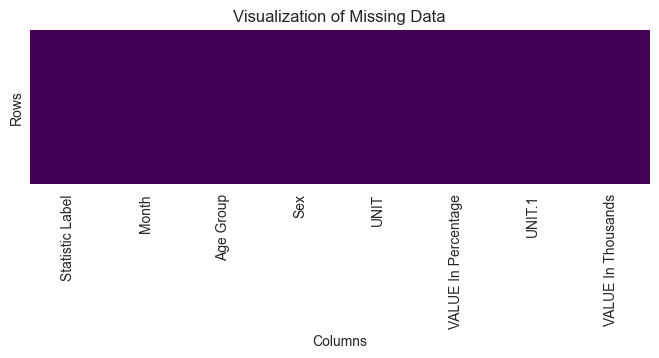

In [53]:
plt.figure(figsize=(8,2))
sbn.heatmap(monthlyUnemploymentDF.isnull(),cbar=False,cmap='viridis', yticklabels=False)
plt.title("Visualization of Missing Data")
plt.xlabel("Columns")
plt.ylabel("Rows")
plt.show()

#### As we can see above that we don't have any missing data in our dataset

#### Now lets look for any duplicate values in our datase. It is very common to get duplicate data in our dataset.It is important step to look for any duplicate rows in dataset and remove them if we find any.

In [54]:
dupliatevaluesForDA = monthlyUnemploymentDF.duplicated().sum()
print("Duplicate rows in our Dataset are: ", dupliatevaluesForDA)

Duplicate rows in our Dataset are:  0


#### Anoother import step is to check the data type of each column. and if there is a mismath in the data aand it's type. we can fix it. Below I used the info method to test the data types of each column.

In [55]:
monthlyUnemploymentDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Statistic Label      1854 non-null   object 
 1   Month                1854 non-null   object 
 2   Age Group            1854 non-null   object 
 3   Sex                  1854 non-null   object 
 4   UNIT                 1854 non-null   object 
 5   VALUE In Percentage  1854 non-null   float64
 6   UNIT.1               1854 non-null   object 
 7   VALUE In Thousands   1854 non-null   float64
dtypes: float64(2), object(6)
memory usage: 116.0+ KB


#### As we noticed above that our Month column is of object type. We will convert it later while preparing our data for ML.

In [56]:
monthlyUnemploymentDF['Month'] = pd.to_datetime(monthlyUnemploymentDF['Month'])
#print("New Date: ", monthlyUnemploymentDF['Month'])

#### Now lets get some statistics about our data using describe method. It will give us standard deviation,count, mean etc

In [57]:
monthlyUnemploymentDF.describe()

,VALUE In Percentage,VALUE In Thousands
count,1854.000000,1854.000000
mean,10.680529,56.665696
std,7.539243,48.541094
min,2.900000,11.000000
25%,4.700000,25.200000
50%,8.800000,39.000000
75%,13.200000,69.675000
max,39.300000,268.400000


### With the help of describe method we came to the conclusion that in Value In Percentage the average unemployment rate is around 10.68% and the minimum unemployment rate is 2.9%. We got discovered that the median is 8.8 percent. and we noticied that half of the observasions are below 8.8% and half are above 8.8% in uneployment rates.The aevrage of  unemployment in thousands is 56.67k. The minimum count is 11k and maximum is 268.4k and median is 39k.


### Now let's visualize out of range data. we can use numerical columns for that. and we weill be using boxplot to look for outliers. Outliers are data points that are different from other data points. for example we have a data of a store and we are checking how many oranges are sold per day and one datapoint shows that 200,000 sold per day so that will be outlier.

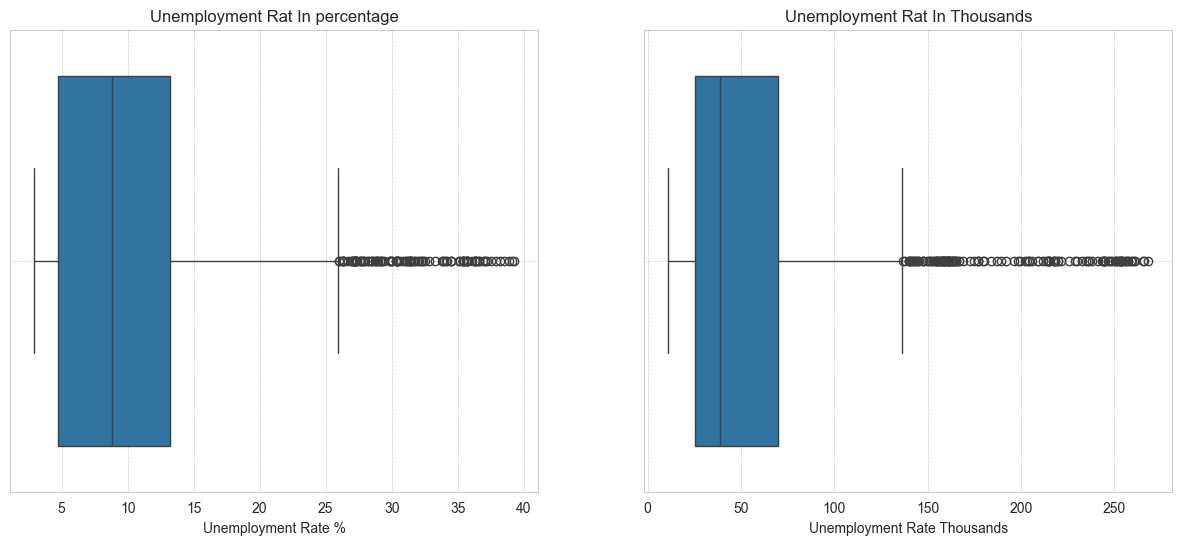

In [58]:
# visualizing out of range data data using boxplot
fig,ax=plt.subplots(nrows=1, ncols=2, figsize=(15,6))

# BoxPlot for value In Percentage
sbn.boxplot(x=monthlyUnemploymentDF['VALUE In Percentage'],ax=ax[0])
ax[0].set_title("Unemployment Rat In percentage")
ax[0].set_xlabel("Unemployment Rate %")
ax[0].grid(True, which="both",linestyle='--',linewidth=0.5)

# BoxPlot for value In Thousands
sbn.boxplot(x=monthlyUnemploymentDF['VALUE In Thousands'],ax=ax[1])
ax[1].set_title("Unemployment Rat In Thousands")
ax[1].set_xlabel("Unemployment Rate Thousands")
ax[1].grid(True, which="both",linestyle='--',linewidth=0.5)

#### For Unemployment Rate In Percentage, We can see above that the unemployment rate looks normal(Most Of The Time). But In few times when it goes up a little. This can happen because of many reasons like some age group of people having bad time finding jobs. And for Unemployment rate in Thousands,it is either very less or lot of people without jobs than usual. this could be because of a time when people find it easy or difficult to find job or for some age group it is easy or hard to get job.


### Now let's look for dirty data. let's use some categorical column (Sex and Age Group) and display their distribution to find inconsistencies. Let's test Sex column and look for inconsistant labels or uneexpected categories.

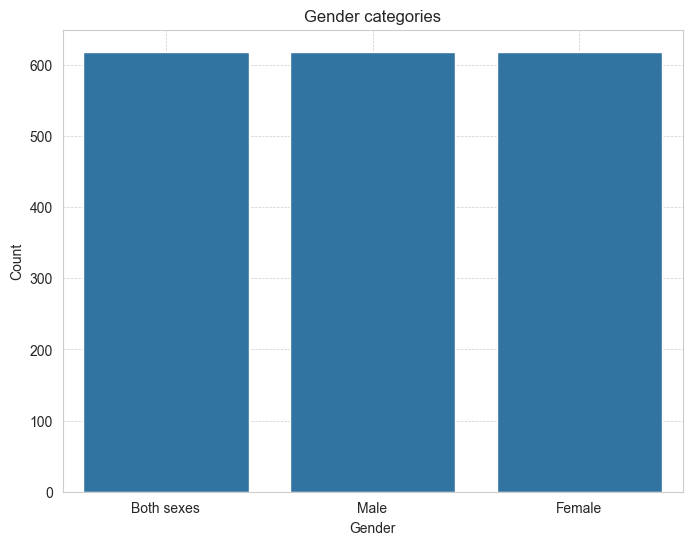

In [59]:
#visualize the distribution of categories in the sex column
plt.figure(figsize=(8,6))
sbn.countplot(data=monthlyUnemploymentDF,x='Sex')
plt.title("Gender categories")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.grid(True,which="both",linestyle="--",linewidth=0.5)
plt.show()

#### The above plot shows that the data is consistant. We got distinct categories of male, female and both sexes. Now to futher check for dirty data we should also check the other categorical column 'Age Group' to make sure that our data isn't dirty. So let's check the other column now.

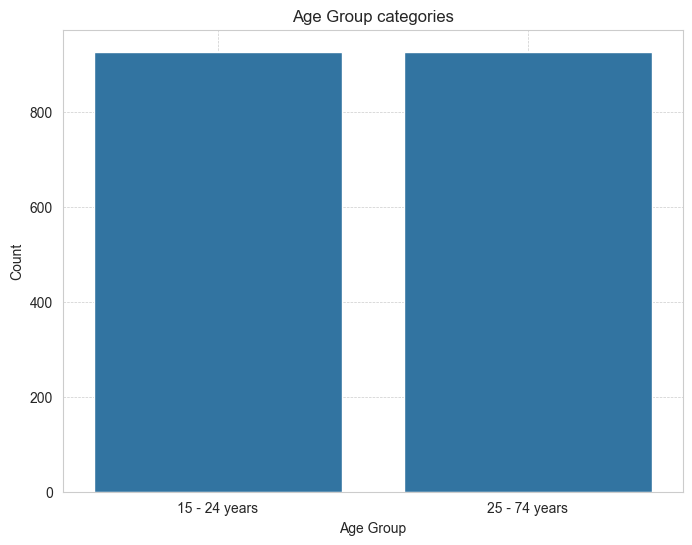

In [60]:
#visualize the distribution of categories in the sex column
plt.figure(figsize=(8,6))
sbn.countplot(data=monthlyUnemploymentDF,x='Age Group')
plt.title("Age Group categories")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.grid(True,which="both",linestyle="--",linewidth=0.5)
plt.show()

#### We got the distinct categories(15 - 24 years and 25 to 75 years). so the data seems consistant.

#### Now lets do one more step to check the data consistency . As we already checked for any missing values in our dataset so let's check if the month column is in good format.

In [61]:
# Extracting unique month year combinations
monthUniqueValues=monthlyUnemploymentDF['Month'].unique()

# let's check for first few and last few rows for consistency
firstAndLastRows=np.concatenate([monthUniqueValues[:5],monthUniqueValues[-5:]])
firstAndLastRows

array(['1998-01-01T00:00:00.000000000', '1998-02-01T00:00:00.000000000',
       '1998-03-01T00:00:00.000000000', '1998-04-01T00:00:00.000000000',
       '1998-05-01T00:00:00.000000000', '2023-05-01T00:00:00.000000000',
       '2023-06-01T00:00:00.000000000', '2023-07-01T00:00:00.000000000',
       '2023-08-01T00:00:00.000000000', '2023-09-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

####  This data looks consistant. the first few rows are of from 1998 January To May. and last few are from 2023 june to september

### Lets Visualize our dataset to understand it better. We can use different plots to know more about our data visually

#### Let's plot the distribution of 'Vvalue in thousands' and 'Value In pErentage'. I am using histogram to plot it because it is primary tool to understand the numerical data. The data get partitioned into bins and then it counts the number of rows for every bin and this way we can see if data is clustered and if there are any outliers. With histograms we an have quick view of distributions

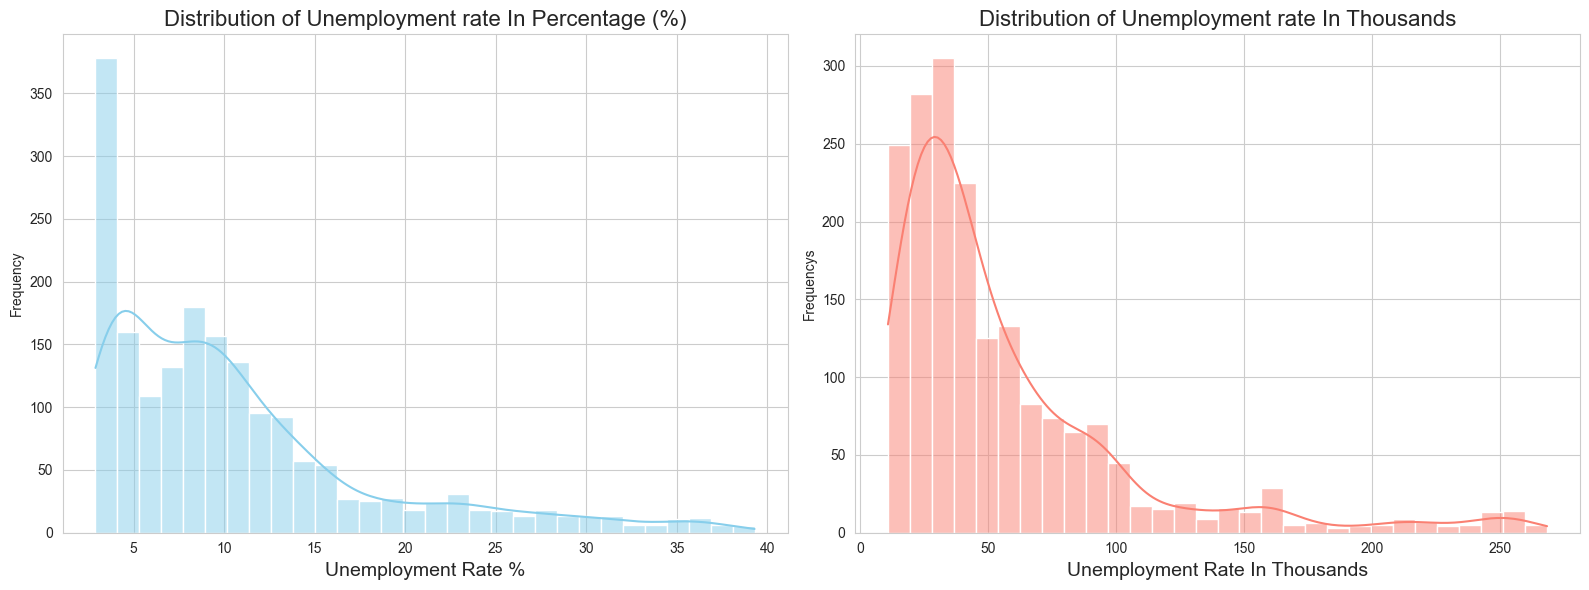

In [62]:
monthlyUnemploymentDF['Month'] = pd.to_datetime(monthlyUnemploymentDF['Month'])
# first of all i will set the style for seaborn plot to get better aesthetics
sbn.set_style("whitegrid")

# ccreate a figure for 2 subplots. one for each column
fig,ax = plt.subplots(1,2,figsize=(16,6))

# lets plot distribution for 'Value In Percentage'
# i will be using kernel density estimation to get a smooth curve which estimates the probability density function of the variable
sbn.histplot(monthlyUnemploymentDF['VALUE In Percentage'], bins=30, ax=ax[0],kde=True,color='skyblue')
ax[0].set_title("Distribution of Unemployment rate In Percentage (%)",fontsize=16)
ax[0].set_xlabel("Unemployment Rate %",fontsize=14)
ax[0].set_ylabel("Frequency")

# Lets plot for Value In Thousands
sbn.histplot(monthlyUnemploymentDF['VALUE In Thousands'], bins=30, ax=ax[1],kde=True,color='salmon')
ax[1].set_title("Distribution of Unemployment rate In Thousands",fontsize=16)
ax[1].set_xlabel("Unemployment Rate In Thousands",fontsize=14)
ax[1].set_ylabel("Frequencys")

plt.tight_layout()
plt.show()

#### well this graph explains taht the most of the data points indicate the unemployment rate between 3 to 15 percent. In few ases the unemployment rate is close to  40 percent. This could be becaus eof specific genders,age groups or year and month. And in unemployment rate in thousands most of the data points are between 10 to 80k. few people crossing 200k and this could be because of different age group or gender or time.

#### I used the different colors for two graphs because this way it will be differentisted. and viewr an focus on them. skyblue and salmon color really contras well.

## Let's plot another graph for Unemployment Rate Over Time and understand our data better

### Let's create line graph to show the unemployment rate over time. As we know thes graphs are goood to show change over time. I am going to plot unemployment rate by month so this is best graoh to work with.

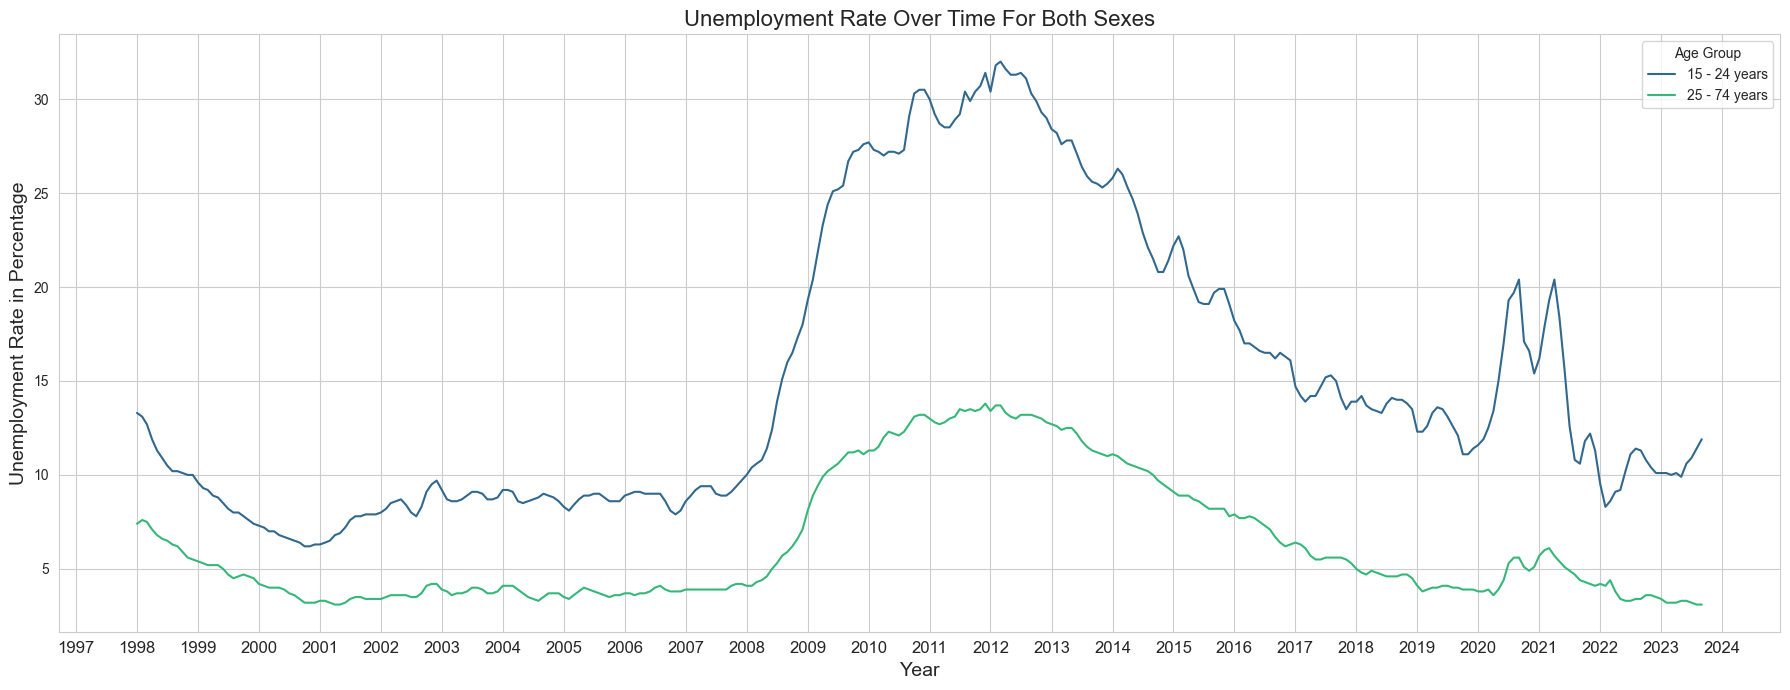

In [63]:
import matplotlib.dates as mdates
# First of all let's select both sexes from our data so we can see the graph for ale and female
monthlyUnemploymentDF['Month'] = pd.to_datetime(monthlyUnemploymentDF['Month'])
filetredOfBothSexForViz = monthlyUnemploymentDF[monthlyUnemploymentDF['Sex']=='Both sexes']

# let's set teh size of our graph
plt.figure(figsize=(18,7))

# we will draw line to show the unemployment rate in percentage and diffrent shades for different age groups and with help of viridis we an easily differentiate colors because it gives the good progression of colors
sbn.lineplot(data=filetredOfBothSexForViz, x= 'Month',y='VALUE In Percentage',hue="Age Group",palette="viridis")

# Let's set the title and labels and also the size
plt.title("Unemployment Rate Over Time For Both Sexes", fontsize=16)
plt.xlabel('Year', fontsize = 14)
plt.ylabel("Unemployment Rate in Percentage", fontsize = 14)
plt.legend(title="Age Group")

# Since we have alot of data and we can't show motnh of eah year beause it won't be readable so let's adjust our x-axix to show only start of eery year
plt.xticks(fontsize=12)
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# we don't want our lables and titles to overlap so lets use tight_layout function and display the graph
plt.tight_layout()
plt.show()

### With the help of above graph we can see how the unemployment rate has changed over time for diffrent age groups. With lines in our graph we an see good and bad times in unemployment rate. This graph is for different age groups so we can see if one age group is affected in different time. Also I have increasef the size of labels and titiles so they area easily readable now.

## Now let's create one more graph and display unemployment rate by Age groups and Genders. 

### With teh help of this graph we an get to knwo how unemployment rate changes across different age groups and genders. So we will know which age groups are ore affected by unemployment rate and if tere are inconsistancy between different genders in these age groups.

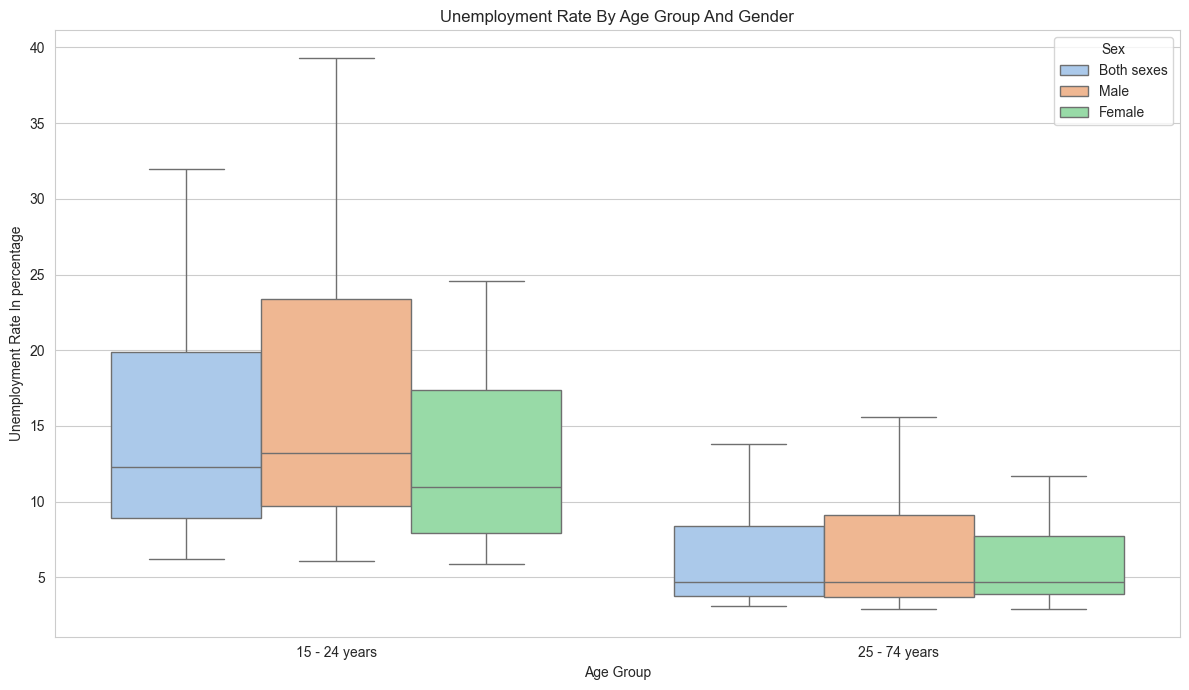

In [64]:
# Let's create size of plot
monthlyUnemploymentDF['Month'] = pd.to_datetime(monthlyUnemploymentDF['Month'])
plt.figure(figsize=(12,7))
sbn.boxplot(data=monthlyUnemploymentDF,x='Age Group', y='VALUE In Percentage',hue='Sex',palette='pastel')
plt.title("Unemployment Rate By Age Group And Gender")
plt.xlabel("Age Group")
plt.ylabel("Unemployment Rate In percentage")
plt.legend(title="Sex")
plt.tight_layout()
plt.show()

### By using Boxplot we can compare the distribution of unemployment rates by different age groups and genders side by side. we can use other plots like bar plots for this situation as well but the boxplot is useful when we want to study the distribution and spread of data. 

 # Question: You must also rationalise justify and detail all the methods used to prepare the data for ML. [0-30]

### As we already checked for any  null or duplicate values in our EDA and fortunately we have no null or duplicate alues in our dataset. This is important step because if we have any gaps in our data so we need to fill them or handle duplicate values and we don't do that so we will get incorrect results while using the data for predictions.

### Now lets  move to the next step and prepare our data for ML

### Let's do some feature engineering. As we know that features are used to make predictions. So feature engineering is like making those variables for meaningful analysis.  For example in our dataset the Month column has both year and Month in it (like this: 1998 July).Let's get year and month into 2 seprate columns. By doing this it will be easy for Machine Learning models to spot trends over time.

In [65]:
# Let's first convert the month into datetime
monthlyUnemploymentDF['Year']=pd.to_datetime(monthlyUnemploymentDF['Month'])

# now we can extract the month and year using from datetime format
monthlyUnemploymentDF['Year']=monthlyUnemploymentDF['Month'].dt.year
monthlyUnemploymentDF['MonthNumber'] = monthlyUnemploymentDF['Month'].dt.month

# Now we have month and year seprately. so lets drop month column
monthlyUnemploymentDF.drop('Month',axis=1,inplace=True)
monthlyUnemploymentDF.head()

,Statistic Label,Age Group,Sex,UNIT,VALUE In Percentage,UNIT.1,VALUE In Thousands,Year,MonthNumber
0,Seasonally Adjusted Monthly Unemployment Rate,15 - 24 years,Both sexes,%,13.3,Thousand,55.4,1998,1
1,Seasonally Adjusted Monthly Unemployment Rate,15 - 24 years,Male,%,13.7,Thousand,31.5,1998,1
2,Seasonally Adjusted Monthly Unemployment Rate,15 - 24 years,Female,%,12.7,Thousand,23.9,1998,1
3,Seasonally Adjusted Monthly Unemployment Rate,25 - 74 years,Both sexes,%,7.4,Thousand,96.2,1998,1
4,Seasonally Adjusted Monthly Unemployment Rate,25 - 74 years,Male,%,6.9,Thousand,55.4,1998,1


### Now let's move further and convert our categorical features into numerial columns becasue we know that machine learning models prefer numbers.  We have 2 categorical columns (Age Group and Sex) and limited numbers of unique values so we will use one-hot encoding which is good for such situations. with help of this we can create a column for each category and use 0 and 1 to show the presence of value. This process is called encoding. Machine learning models use such data effetively.

In [66]:
encodedDataForAgeAndSex=pd.get_dummies(monthlyUnemploymentDF, columns=['Age Group', 'Sex'])
#Lets's display to see the output
encodedDataForAgeAndSex

,Statistic Label,UNIT,VALUE In Percentage,UNIT.1,VALUE In Thousands,Year,MonthNumber,Age Group_15 - 24 years,Age Group_25 - 74 years,Sex_Both sexes,Sex_Female,Sex_Male
0,Seasonally Adjusted Monthly Unemployment Rate,%,13.3,Thousand,55.4,1998,1,1,0,1,0,0
1,Seasonally Adjusted Monthly Unemployment Rate,%,13.7,Thousand,31.5,1998,1,1,0,0,0,1
2,Seasonally Adjusted Monthly Unemployment Rate,%,12.7,Thousand,23.9,1998,1,1,0,0,1,0
3,Seasonally Adjusted Monthly Unemployment Rate,%,7.4,Thousand,96.2,1998,1,0,1,1,0,0
4,Seasonally Adjusted Monthly Unemployment Rate,%,6.9,Thousand,55.4,1998,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1849,Seasonally Adjusted Monthly Unemployment Rate,%,12.5,Thousand,22.5,2023,9,1,0,0,0,1
1850,Seasonally Adjusted Monthly Unemployment Rate,%,11.3,Thousand,19.0,2023,9,1,0,0,1,0
1851,Seasonally Adjusted Monthly Unemployment Rate,%,3.1,Thousand,74.2,2023,9,0,1,1,0,0
1852,Seasonally Adjusted Monthly Unemployment Rate,%,3.2,Thousand,40.7,2023,9,0,1,0,0,1


### Now if we look at our dataset. we see that Unit and Unit.1 is not important for our analysis. so let's drop them. Removing unnecessary features make our analysis fast.  these Unit and Unit.1 features are repeating some information.

In [67]:
dropedUnitAndUnit1 = encodedDataForAgeAndSex.drop(columns=['UNIT','UNIT.1'])
monthlyUnemploymentFilteredDF=dropedUnitAndUnit1
monthlyUnemploymentFilteredDF.head()

,Statistic Label,VALUE In Percentage,VALUE In Thousands,Year,MonthNumber,Age Group_15 - 24 years,Age Group_25 - 74 years,Sex_Both sexes,Sex_Female,Sex_Male
0,Seasonally Adjusted Monthly Unemployment Rate,13.3,55.4,1998,1,1,0,1,0,0
1,Seasonally Adjusted Monthly Unemployment Rate,13.7,31.5,1998,1,1,0,0,0,1
2,Seasonally Adjusted Monthly Unemployment Rate,12.7,23.9,1998,1,1,0,0,1,0
3,Seasonally Adjusted Monthly Unemployment Rate,7.4,96.2,1998,1,0,1,1,0,0
4,Seasonally Adjusted Monthly Unemployment Rate,6.9,55.4,1998,1,0,1,0,0,1


# Question: Appropriate visualizations must be used to engender insight into the dataset and to illustrate your final insights gained in your analysis. 

####  First of all after loading our data we looked into the structure of our data using head and tail methods. We also described our adta and 

# Statistics for Data Analytics

# Question: Summarise your dataset clearly, using relevant descriptive statistics and appropriate plots. These should be carefully motivated and justified, and clearly presented. You should critically analyse your findings, in addition to including the necessary Python code, output and plots in the report. You are required to plot at least three graphs. [0-35]

#### Lets start by looking into the dataset taht what we have in it and about data types or any null values

In [68]:
monthlyUnemploymentFilteredDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Statistic Label          1854 non-null   object 
 1   VALUE In Percentage      1854 non-null   float64
 2   VALUE In Thousands       1854 non-null   float64
 3   Year                     1854 non-null   int64  
 4   MonthNumber              1854 non-null   int64  
 5   Age Group_15 - 24 years  1854 non-null   uint8  
 6   Age Group_25 - 74 years  1854 non-null   uint8  
 7   Sex_Both sexes           1854 non-null   uint8  
 8   Sex_Female               1854 non-null   uint8  
 9   Sex_Male                 1854 non-null   uint8  
dtypes: float64(2), int64(2), object(1), uint8(5)
memory usage: 81.6+ KB


#### This above inforation shows that we have total 1854 rows and 10 ccolumns in total. First Of all we got the 'Statistic Label' column which has no null value and is of string type. This olumn is woking like a label and telling us we heve unemployment data.  The second column 'VALUE In Percentage' has unemployment rate in percentage. there are no null values in the dataset and the datatype of it is float then the next column 'VALUE In Thousands' shows the number of unemployed people in thousands. and it's not null as well. Then Age Group_15 - 24 years  and Age Group_25 - 74 years are binary column and accept 0 and 1 as value and are all not null. Sex_Both sexes , Sex_Female AND Sex_Male are binary column too indicating gender category. Year and monthNuber are extracted from month column and are of int type and all are not null.

### Now let's calculate the mean, median, variance, and standard deviation on whole dataset. First We will calculate the basic measures like Mean, median, variance and standard deviation in percentage and in thousands as well.

In [69]:
# Basic measures for whole dataset

basicMeasuresForWholeData ={
    'Mean Of VALUE In Percentage' : monthlyUnemploymentFilteredDF['VALUE In Percentage'].mean(),
    'Median Of VALUE In   Percentage' : monthlyUnemploymentFilteredDF['VALUE In Percentage'].median(),
    'Variance Of VALUE In   Percentage' : monthlyUnemploymentFilteredDF['VALUE In Percentage'].var(),
    'Standard Deviation Of VALUE In  Percentage' : monthlyUnemploymentFilteredDF['VALUE In Percentage'].std(),
    
    'Mean Of VALUE In Thousands' : monthlyUnemploymentFilteredDF['VALUE In Thousands'].mean(),
    'Median Of VALUE In  Thousands' : monthlyUnemploymentFilteredDF['VALUE In Thousands'].median(),
    'Variance Of VALUE In  Thousands' : monthlyUnemploymentFilteredDF['VALUE In Thousands'].var(),
    'Standard Deviation Of VALUE In  Thousands' : monthlyUnemploymentFilteredDF['VALUE In Thousands'].std()
}
basicMeasureTableDF=pd.DataFrame(basicMeasuresForWholeData, index =['Value']).T
display(basicMeasureTableDF);

,Value
Mean Of VALUE In Percentage,10.680529
Median Of VALUE In Percentage,8.800000
Variance Of VALUE In Percentage,56.840187
Standard Deviation Of VALUE In Percentage,7.539243
Mean Of VALUE In Thousands,56.665696
Median Of VALUE In Thousands,39.000000
Variance Of VALUE In Thousands,2356.237840
Standard Deviation Of VALUE In Thousands,48.541094


### Now let's calculate the mean for just males and females. By breaking down the data by genders will help us understand the unemployment rate by genders. This way we can get deeper understanding of our dataset. It will help us understand if certain genders are affected by uneployment.

In [70]:
# Let's first calculate Mean for just Males

# First we will filter the data to only get rows where gender is Male 
maleMean=monthlyUnemploymentFilteredDF[monthlyUnemploymentFilteredDF['Sex_Male']==1]['VALUE In Percentage']

# Now let's find the descriptives for example mean,median, quantiles for males unemployment rate in percentage
maleMean = maleMean.describe()

maleMean['variance'] = maleMean.var()

print("Measures For Males:\n",maleMean)

Measures For Males:
 count         618.000000
mean           11.948382
std             9.083101
min             2.900000
25%             4.700000
50%             9.600000
75%            14.975000
max            39.300000
variance    45848.319195
Name: VALUE In Percentage, dtype: float64


#### With the above analysis we disovered that the unemployment rate for males is 11.95 percent (on average) that means around 11.95 percent of males are unemployed. The median is 9.6% which means in half of our data points the unemployment rate for males is under 9.6%. With the help of this information we get to know that in some time period unemployment rate for males migh be considerably high.

#### The variance is 82.5 and Standard deviation is 9.08 %. this tells us that the unemployment rate for males vary in our dataset. This high variation could be because of different reasons. Well the lowest unemployment rate is 2.9 percent and the highest is 39.3 percent.

#### let's talk about the quantiles, 25 percent of data points have unemployment rate below 4.7 for males. and 75percent of the data records rate below 14.98 percent. This gives us interquantile range and emphasizes entral clustring of most of our data.

In [71]:
# Let's use the same way to calculate Mean for  Females

# First we will filter the data to only get rows where gender is Male 
femaleMean=monthlyUnemploymentFilteredDF[monthlyUnemploymentFilteredDF['Sex_Female']==1]['VALUE In Percentage']

# Now let's find the descriptives for example mean,median, quantiles for males unemployment rate in percentage
femaleMean = femaleMean.describe()

femaleMean['variance'] = femaleMean.var()

print("Measures For Females:\n",femaleMean)

Measures For Females:
 count         618.000000
mean            9.359061
std             5.564753
min             2.900000
25%             4.700000
50%             7.900000
75%            11.475000
max            24.600000
variance    46329.282255
Name: VALUE In Percentage, dtype: float64


#### The results above for Females shows a slightly differnt image. Average unemployment rate for females is around 9.36 percent. which is lower than males. so females faed lower unemployment rate in our dataset. The median is 7.9 for females whih means half of our data points record an unemployment rate below this number.

#### Variance and standard deviation is 30.97 and 5.56 percent. if we compare this with males these numbers are lower which means that female unemployment rates are less variable and more consistant. The minimum unemployment rate for females is same of males. but the maximum number is lower at 24.6 percent.  This shows that feales have lower unemployment rates than males.

### Let's calculate the measures for each Age Group

In [72]:
# Let's use the same way to calculate Mean for  Females

# First we will filter the data to only get rows where age group is 15 to 24 
age15To24Measures=monthlyUnemploymentFilteredDF[monthlyUnemploymentFilteredDF['Age Group_15 - 24 years']==1]['VALUE In Percentage']

# Now let's find the descriptives for example mean,median, quantiles for 15 to 24 age group unemployment rate in percentage
age15To24Measures = age15To24Measures.describe()

age15To24Measures['variance'] = age15To24Measures.var()

print("Measures For Age Group_15 - 24 years:\n",age15To24Measures)

Measures For Age Group_15 - 24 years:
 count          927.000000
mean            15.038080
std              8.015164
min              5.900000
25%              8.900000
50%             11.900000
75%             19.450000
max             39.300000
variance    103966.348307
Name: VALUE In Percentage, dtype: float64


In [73]:
# Let's use the same way to calculate Mean for  Females

# First we will filter the data to only get rows where age group is 15 to 24 
age25To74Measures=monthlyUnemploymentFilteredDF[monthlyUnemploymentFilteredDF['Age Group_25 - 74 years']==1]['VALUE In Percentage']

# Now let's find the descriptives for example mean,median, quantiles for 15 to 24 age group unemployment rate in percentage
age25To74Measures = age25To74Measures.describe()

age25To74Measures['variance'] = age25To74Measures.var()

print("Measures For Age Group_25 - 74 years:\n",age25To74Measures)

Measures For Age Group_25 - 74 years:
 count          927.000000
mean             6.322977
std              3.388419
min              2.900000
25%              3.800000
50%              4.700000
75%              8.350000
max             15.600000
variance    105946.509165
Name: VALUE In Percentage, dtype: float64


#### In above 2 cells we calculated the measures by age group. This way we can find if unemployment rates are different for younger and older people. And teh numbers showed us that the younger people faced more challanges than older people. Well this could be because of many reasons. For example younger people have less work experience, maybe the skills they possess are not in demand very much,transition from studies to work , or it could be because of economic factors.

#### For Age Group 15 - 24 years the measures says that the average unemployment rate is 15.04 pecent. which is high number especially when we check the middle value which is 11.9 percent. 

#### Then the Variance and standard deviation is 64.24 and 8.02 percent, these numbers learlly show the fluctuation in unemployment rate. Then the 25 and 75 % of data points of this age group have unemployment below 8.9 and 19.45 respectively.  This helps us to know that where most of the unemployment rates falls and show this age group often faes job challenges.


#### For Age Group 25 - 74 years the numbers are different. The average unemployment rate is 6.32 percent which is lower than younger people group. Median is lower too at 4.7 percent that means half of the data points record unemployment rate below this number.

#### the Variance and standard deviation is 11.48 and 3.39 and that is also lower than younger group. This means that this age group had fewer fluctuatuations and unemployment arte is stable as compared to younger group.

####  The minimum returned 2.9 and maximum is 15.6 for this age group . This means 25 - 74 years dosen't face the same unemployment issues. The 25 and 75 %  of quantiles are 3.8% and 8.35 %. this means that the unemployment rate dosen't vary too uh for this age group.

## We have done EDA and statistical analysis on our data. we looked for null values. and total count of our data. also checked for data types and then Calculated Mean, Median, Variance, Standard Deviation, Minium, Maximum, and Quantiles of our whole dataset and of groups as well. Now we knwo what our data says about unemployment rate for each group. Now let's plot graphs and see our data visually.

#### Let's Visualize the yearly average unemployment Rate. With the help of this graph we can identify the frequency of diffrent unempployment rates in our dataset. We can use the histogram to show the distribution of unemployment rate. Histogram is good to understand the distribution of continous data. 

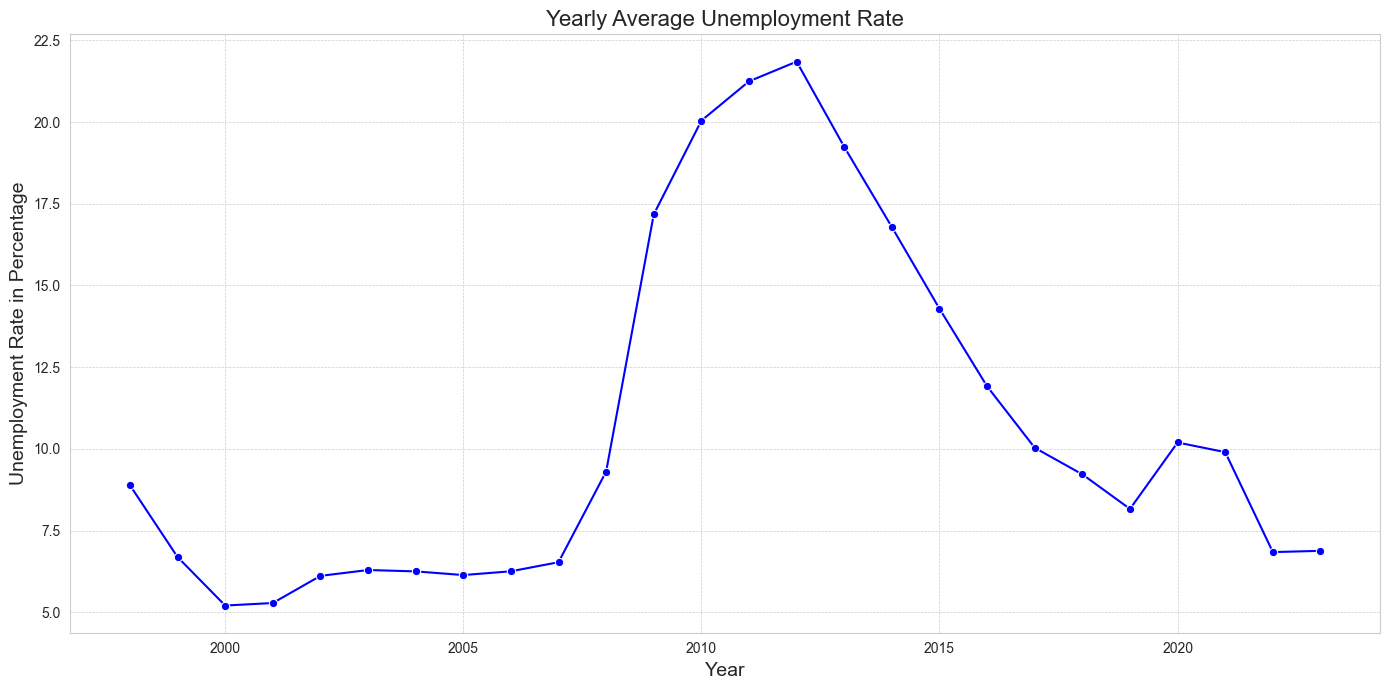

In [74]:
# To plot yearly unemployment rate, we need to find the mean and group the data by year

yearlyUnemploymedntRateFiltered=monthlyUnemploymentFilteredDF.groupby('Year')['VALUE In Percentage'].mean().reset_index()
yearlyUnemploymedntRateFiltered.columns=['Year','Average Unemployment Rate']

# we grouped our data so now let's plot graph
plt.figure(figsize=(14,7))
sbn.lineplot(data=yearlyUnemploymedntRateFiltered,x='Year',y='Average Unemployment Rate',color='blue',marker='o')
plt.title("Yearly Average Unemployment Rate", fontsize=16)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Unemployment Rate in Percentage',fontsize=14)
plt.grid(True,which='both',linestyle='--',linewidth=0.5)
plt.tight_layout()
plt.show()

#### This graph shows the change in unemployment rate in diffrent years. With the help of this graoh we an see which year has the highest unemployment rate. We can see a spike in uneployment rate then there is deline and then again increase in the unemployment. 

### Lets display second graph to show unemployment rate by gender

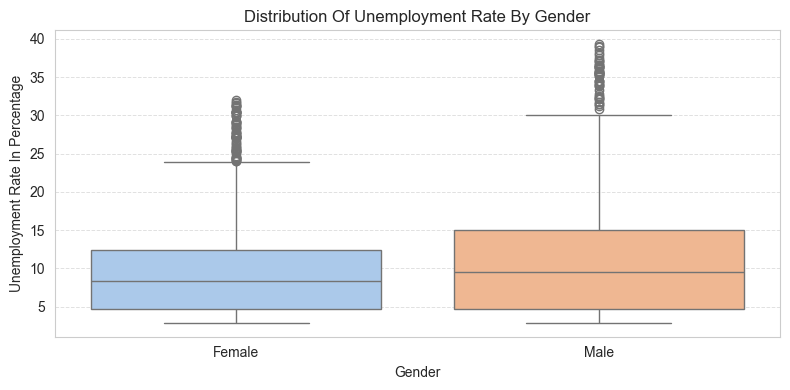

In [75]:
plt.figure(figsize=(8,4))
sbn.boxplot(data=monthlyUnemploymentFilteredDF,x='Sex_Male',y='VALUE In Percentage',palette='pastel')
plt.title('Distribution Of Unemployment Rate By Gender')
plt.xlabel('Gender')
plt.ylabel('Unemployment Rate In Percentage')
plt.grid(True,axis='y',linestyle='--',linewidth=0.7,alpha=0.6)
plt.xticks([0,1],['Female','Male'])
plt.tight_layout()
plt.show()

#### As we already discussed while calculating mean for group data that the unemployment rate for males is slightly high than women. We acn see that with the help of graph that the male unemployment rate is higher than wemen. Boxplot give us look that how data is spread out. and with the help of lines and boxes we can see that where most of the data falls and if there are any differenecs. 

### Now let's plot another graph of unemployment rate by Age Groups and justify our Measures. We will be using the histogram again to display teh data.

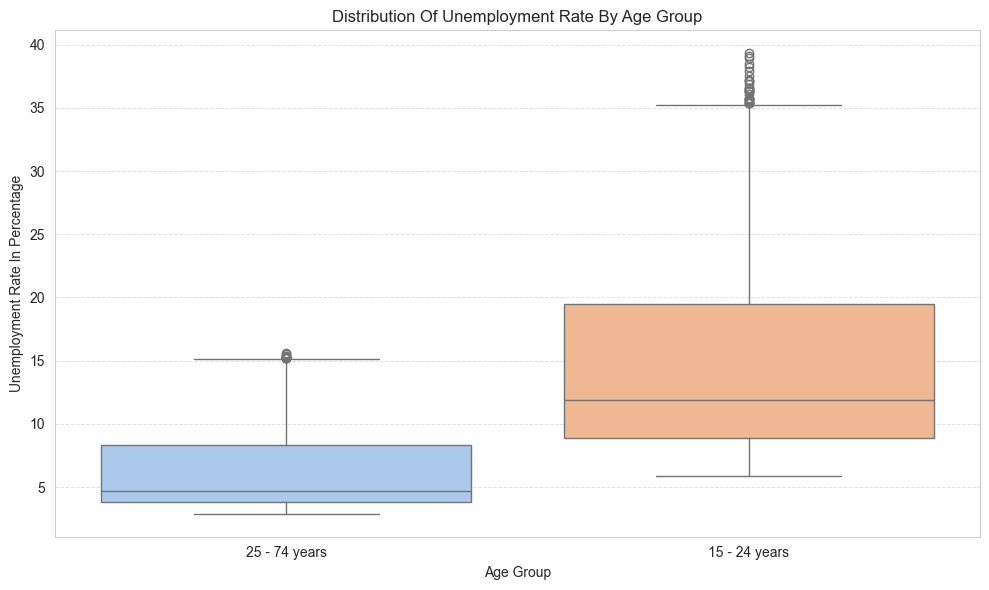

In [76]:

plt.figure(figsize=(10,6))
sbn.boxplot(data=monthlyUnemploymentFilteredDF,x='Age Group_15 - 24 years',y='VALUE In Percentage',palette='pastel')
plt.title('Distribution Of Unemployment Rate By Age Group')
plt.xlabel('Age Group')
plt.ylabel('Unemployment Rate In Percentage')
plt.grid(True,axis='y',linestyle='--',linewidth=0.7,alpha=0.6)
plt.xticks([0,1],['25 - 74 years', '15 - 24 years'])
plt.tight_layout()
plt.show()

#### As we can see that the younger age group has higher median unemployment rate as compared to older age group. And their spread is wide too. This means that younger face more challanges than older people. This could be because of many reasons as i explained before while calculating measures.with these charts and numbers we can see unemployment for different age groups. 

# Question: Use two discrete distributions (Binomial and/or Poisson) in order to explain/identify some information about your dataset. You must explain your reasoning and the techniques you have used. Visualise your data and explain what happens with the large samples in these cases. You must work with Python and your mathematical reasoning must be documented in your report

#### We have been asked to if we can explain our data with some shapes. The two shapes or patterns are mentioned in the question 1) Binomial and Poisson. 

#### Bionomial distribution describes the number of successes in fixed number  of independent Bernoulli trials. Bernoulli trial is an experiment with just 2 outcomes, success or failure. We can understand with this easy example that, on flipping a coin. if we someone gets  head so  he will get the job and if you get tails you won't get the job. If we flip coin for many people so binomial distribution can tell us that how many people will end up without a job.

#### Poisson distribution tells the number of events in a fixed interval of time. Let's take an exampe to understand this as well. Imagine a big ity in which someone losses a job now and then. Poisson distribution can help us guess how many people might loss their jobs in a month.

he Poisson distribution is used when we're counting how many times something happens in a certain space or time. Think of raindrops falling on a window. You can't predict exactly where or when a drop will fall, but you can count them over time. Similarly, we can't predict exactly when someone will become unemployed, but we can count how many people do each month.

#### As we know that the poisson is perfect when count that how many times something happens in a certain time.for example if there is raining and you see rain drops falling on window. it is hard to predict that when rain drop will fall on window but we can count them over time. same, we can't predict when someone will get unemployed but we can count that how many people do get unemployed each month. A s our data is of a specific time so let's use poisson distrubtion to identify some information about our datase.

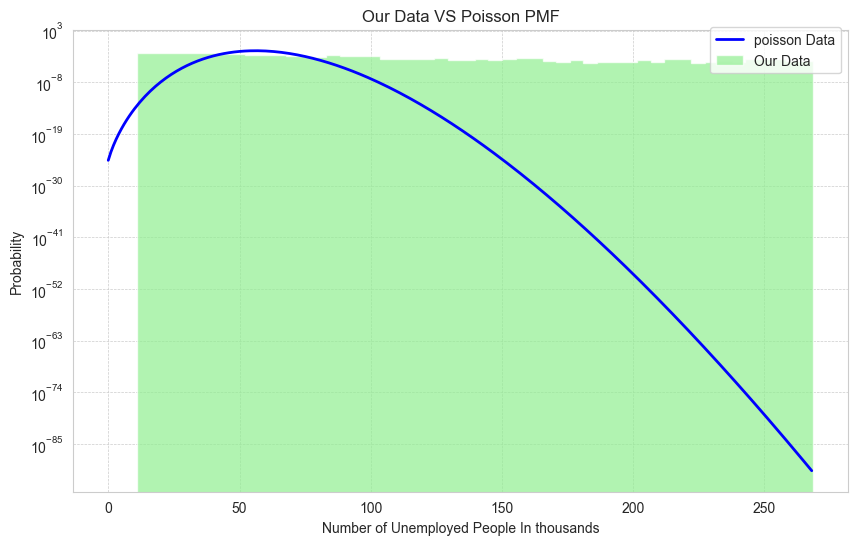

In [78]:
# let's get the VALUE In Thousand data for modeling.
unemployedCounts = monthlyUnemploymentFilteredDF['VALUE In Thousands']
# For poisson distribution we can use the average number of unemployed people as our parameter
# So lets calculate the average number of unemployed people

calculateLambda = unemployedCounts.mean()
poissonValues = [poisson.pmf(k,calculateLambda) for k in range(int(unemployedCounts.max())+1)]

# Now lets plot PMF of poisson distribution and the histogram of data
plt.figure(figsize=(10,6))
plt.plot(range(int(unemployedCounts.max())+1),poissonValues,label="poisson Data",color="blue",linewidth=2)
plt.hist(unemployedCounts,bins=50,density=True,alpha=0.7,label="Our Data", color="lightgreen",histtype="stepfilled")
plt.xlabel("Number of Unemployed People In thousands")
plt.ylabel("Probability")
plt.yscale("log")
plt.title("Our Data VS Poisson PMF")
plt.legend(loc="upper right",bbox_to_anchor=(1,1.02))
plt.grid(True,which="both",linestyle="--",linewidth=0.5)
plt.show()

#### The graph above shows compare 2 things, the one is unemployment numbers in green and a prediction made by poisson distribution.  At some points the green area and the blue line looks similar which means our real data has some part that look like what our poisson distribution predits. But thera are not same everywhere. As we can see that in some areas the green line is higher or lower than blue line which means that with poisson distributtion we got the rough idea. it is not a perfect match. Also we used the special scale called logarithmic fo our graph. with this scale we can clearly see both small and big numbers.

### What Happens with Big Data?

####  Well I beleive that if we have alot of data points things starts becomming more predicctable. Let's check how our data behaves when we have more of it. 

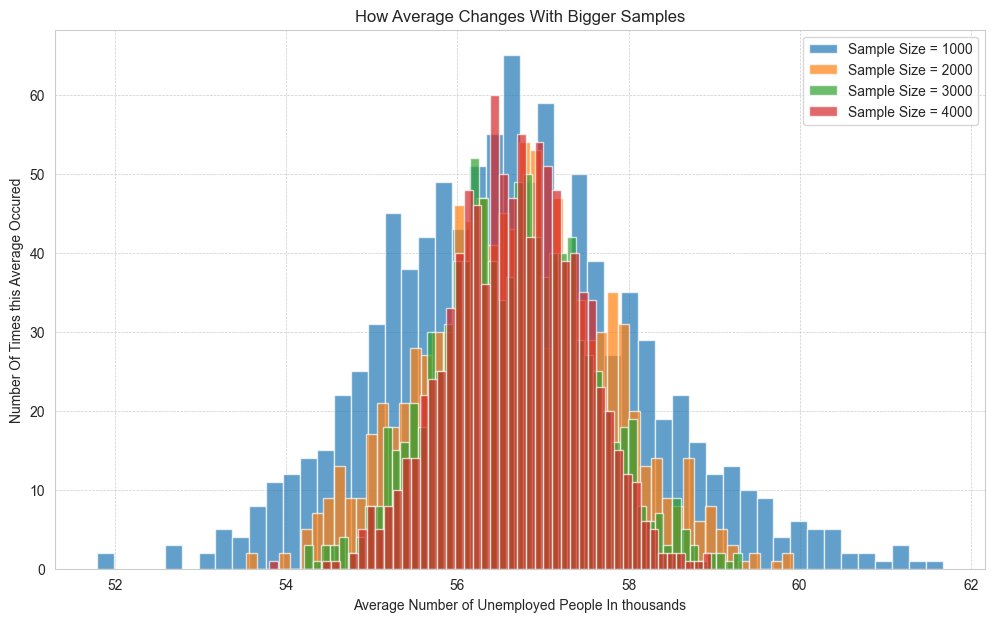

In [79]:
def sampleAverage(dataOfUnemploymentInThousands,sampleSize,times=1000):
    averages=[]
    for _ in range(times):
        sample=np.random.choice(dataOfUnemploymentInThousands,sampleSize)
        averages.append(sample.mean())
        
    return averages

dataOfUnemploymentInThousands = monthlyUnemploymentFilteredDF['VALUE In Thousands']
#sampleSize=[10,50,100,500]
sampleSize=[1000,2000,3000,4000]

plt.figure(figsize=(12,7))
for size in sampleSize:
    averages=sampleAverage(dataOfUnemploymentInThousands,size)
    plt.hist(averages,bins=50,alpha=0.7,label=f"Sample Size = {size}")
plt.xlabel("Average Number of Unemployed People In thousands")
plt.ylabel("Number Of Times this Average Occured")
plt.title("How Average Changes With Bigger Samples")
plt.legend()
plt.grid(True,which="both",linestyle="--",linewidth=0.5)
plt.show()

#### We took our unemployment number and think that what would happen if we only took piece of these numbersinstead of whole data? will the average be close to true average of all numbers. To find out we take different samples like 1000, 2000, 3000, 4000. We actually wanted to check that if our sample's average is reliable. let's understand it with a example to make it more clear. suppose we have alot of cookies and we taste one cookie from them, can we say for sure how all cookies taste? we did this thing with unemployment numbers to see how big our number need to be to get a good taste of whole data.


#### In the number we an see different olored bar for different size. If the bars are wider that means we are unsure about  the average.  And when number gets bigger the bars get closer which means we are consistant about teh aerage. Well smaller numbers's average an be bit off but bigger nubers give us clear picture. By experimenting with different numbers we got o know that bigger samples give us clear understanding of unemployment data. 

# Use Normal distribution to explain or identify some information about your dataset. [0-20]

#### First we will check if the main column of our datase follows the normal distribution. We will use  VALUE In Thousands and VALUE In Percentage to check for normal distribution. These are most relevant columns for this purpose. 

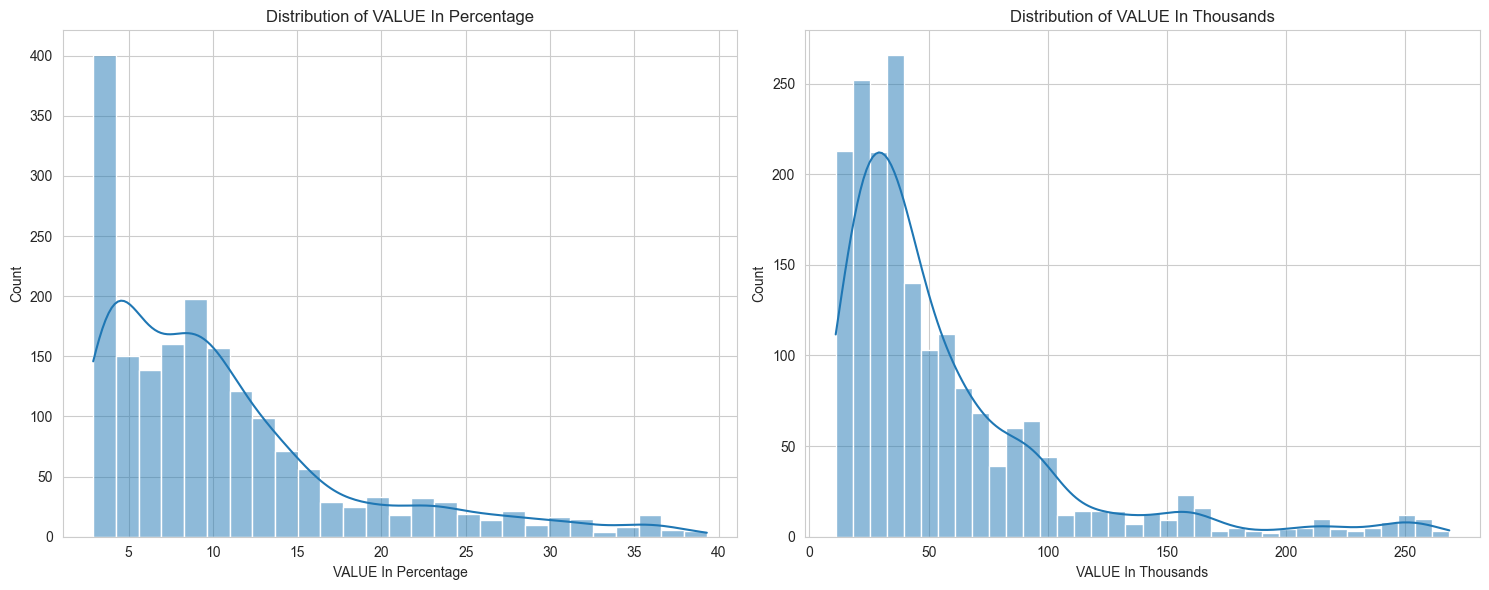

In [80]:
# Let's style our plot
sbn.set_style("whitegrid")
# Now lets plot the distribution of VALUE In Thousands and VALUE In Perentage
fig,ax=plt.subplots(1,2,figsize=(15,6))
sbn.histplot(data=monthlyUnemploymentFilteredDF,x="VALUE In Percentage", kde=True,ax=ax[0])
ax[0].set_title("Distribution of VALUE In Percentage")
ax[0].set_xlabel("VALUE In Percentage")
ax[0].set_ylabel("Count")

sbn.histplot(data=monthlyUnemploymentFilteredDF,x="VALUE In Thousands", kde=True,ax=ax[1])
ax[1].set_title("Distribution of VALUE In Thousands")
ax[1].set_xlabel("VALUE In Thousands")
ax[1].set_ylabel("Count")

plt.tight_layout()
plt.show()

####  They do not seem to be perfectly normal distributed. we can see that they are right skewed. This skewness suggests that or data our data values are concentrated on the ledt side with long tail on right. For right skewed distribution we can considered the logarithic nomality. This will compress large scale and spread the values. Let's apply this transformation and see the results.

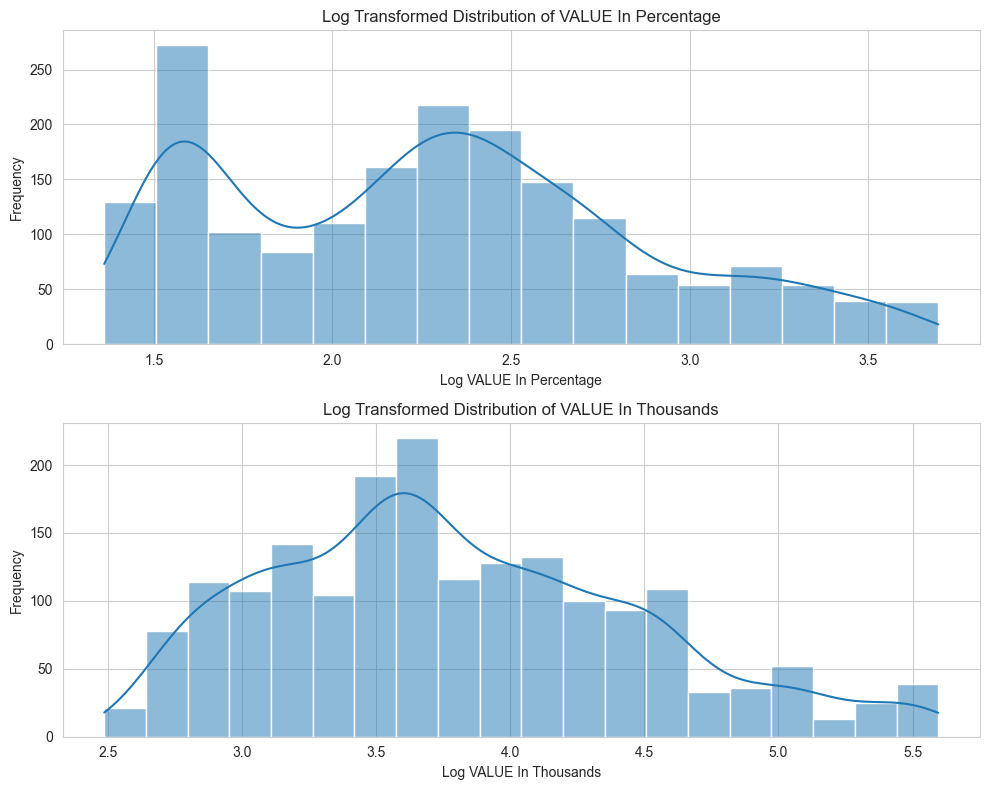

In [83]:
#Lets apply the log transformation
monthlyUnemploymentFilteredDF['Log VALUE In Percentage']=np.log1p(monthlyUnemploymentFilteredDF['VALUE In Percentage'])
monthlyUnemploymentFilteredDF['Log VALUE In Thousands']=np.log1p(monthlyUnemploymentFilteredDF['VALUE In Thousands'])
# lets set up the plot layout
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,8))
# Now lets plot teh distribution
sbn.histplot(data=monthlyUnemploymentFilteredDF['Log VALUE In Percentage'],kde=True,ax=ax[0])
ax[0].set_title("Log Transformed Distribution of VALUE In Percentage")
ax[0].set_xlabel("Log VALUE In Percentage")
ax[0].set_ylabel("Frequency")

sbn.histplot(data=monthlyUnemploymentFilteredDF,x="Log VALUE In Thousands", kde=True,ax=ax[1])
ax[1].set_title("Log Transformed Distribution of VALUE In Thousands")
ax[1].set_xlabel("Log VALUE In Thousands")
ax[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


#### After using the logarithmic which is like marh trick to get the data into normal distribution  the data looks balanced on both side. But the data is not perfectly shaped but it alost follows the bell curve.

#### Now let's use QQ plot to check the distribution.we will compare dataset's quantiles wirth the quantiles from standard normal distribution and if the points foloows the straigh line or cclose to that line so it means it follows the normal distribution.

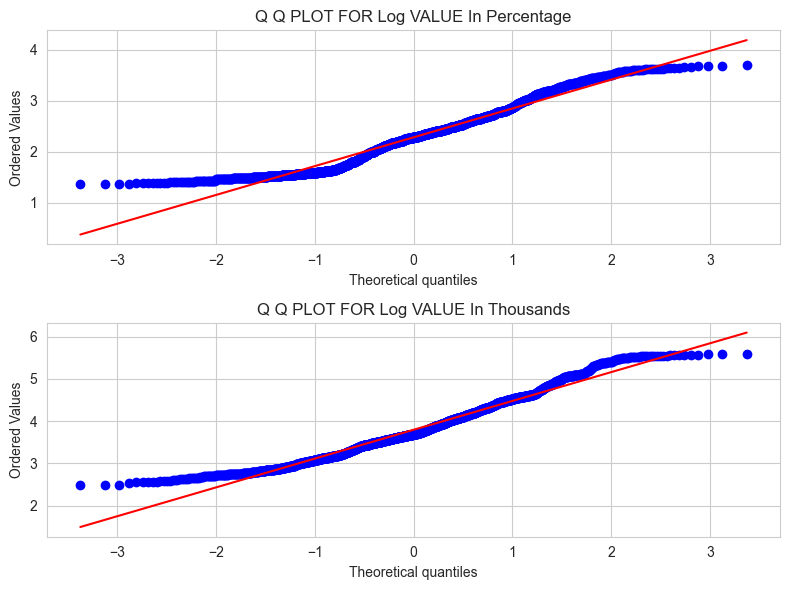

In [92]:
# lets setup our plot layout
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(8,6))

# Now lets create QQ plot for VALUE In Percentage and VALUE In Thousands
stats.probplot(monthlyUnemploymentFilteredDF['Log VALUE In Percentage'], dist="norm",plot=ax[0])
ax[0].set_title("Q Q PLOT FOR Log VALUE In Percentage")

stats.probplot(monthlyUnemploymentFilteredDF['Log VALUE In Thousands'], dist="norm",plot=ax[1])
ax[1].set_title("Q Q PLOT FOR Log VALUE In Thousands")

plt.tight_layout()
plt.show()

#### As we can see that the data is not stricly follows teh straigh line but it is very lose to the normal distribution.

# Question: Explain the importance of the distributions used in point 3 and 4 in your analysis. Justify the choice of the variables and explain if the variables used for the discrete distributions could be used as normal distribution in this case. [0-15]

#### Since I like to explain things with real time examples so let's answer this question with real world example. Imagine some photographer who captures essence of  dublin city. He has 2 lens in his bag, one is to zoom into some specific happenigs and other is to have broader overview. The one which is for specific events is the example of poisson and the other len is for Normal distribution. 

#### Let's talk about poisson. This zooming lens help us to focus on a specific event and understand it's frequency. For example  if we notice a pattern like the TFI Bus No 15 which arrives after every 10 minutes so the poisson distribution helps capture this consistency.

#### In our dataset the columns VALUE In Thousands and VALUE In Percentage represents the specific event like the number of time value appears. so with the help of poisson distribution we can understand how regularly these alues appear in specific time period. It is valuable because it helps us see patterns and ake predictions and understands more about our data that what it is trying to tell.


#### As I said above that Normal distribution captures broader overview. As we were talking about a speific bus in poisson but in Noranl we will say that we will capture the whole trafficsystem of city during different times of day. So we can get general overview. With poisson we looked at specific data details and then saw bigger picture of our data using normal distribution. With these both views we get the complete picture of our data.

#### Also we can use the same ariables for both distributions.  The values in "VALUE In Percentage" and "VALUE In Thousands" shows frequencies. poisson distribution captures exact counts for specific periods. And the noral distribution an help understand the general trend of these froma broader view. And sometimes data dosen't fit the normal distribution by default so we used some tehniques to get it into normal distribution. We used the log to transform our data to normal distribution.

# Question: 2.	Machine learning models have a wide range of uses, including prediction, classification, and clustering. It is advised that you assess several approaches (at least two), choose appropriate hyperparameters for the optimal outcomes of Machine Learning models using an approach of hyperparameter tunning, such as GridSearchCV or RandomizedSearchCV. [0 - 30]

#### When workinh with data different columns can have different ranges. if ranges are big so machine learning models won't work good. results could be biased. To solve this issue we adjust the data so every column has values in same range. We are using StandardScaling which is used to scale our data. it adjust values in every olumn so average is zero.  So we will be using some columns from our dataset as features and and one specific column as targert which we will predict. 

In [123]:
# Lets split data into features and target as i discussed above
#X = monthlyUnemploymentFilteredDF.drop(columns=['Log VALUE In Percentage','Log VALUE In Thousands', 'Statistic Label'])

selectedFeatures = [ "Age Group_15 - 24 years", "Age Group_25 - 74 years","Year", "Sex_Male", "Sex_Female"]

# Splitting the data into training and testing sets (80% train, 20% test)
X_selected = monthlyUnemploymentFilteredDF[selectedFeatures]
#X = monthlyUnemploymentFilteredDF.drop(columns=["Age Group_15 - 24 years", "Year", "Sex_Male", "Sex_Female"])
y=monthlyUnemploymentFilteredDF['Log VALUE In Percentage']
# Now lets split the data into training and testing
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# initialize the object using StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

# it will display the first 5 rows of training data
X_train_scaled[:5]


array([[ 0.18434821,  1.57159266, -0.18404376, -0.40817474, -0.99394952,
         0.99394952, -0.70353371, -0.69925376,  1.39162986],
       [-1.02926138, -0.6518828 , -1.26498196, -0.40817474, -0.99394952,
         0.99394952, -0.70353371, -0.69925376,  1.39162986],
       [-0.27238658,  0.43491876,  0.49154262,  1.6172851 , -0.99394952,
         0.99394952, -0.70353371,  1.43009599, -0.71858188],
       [-0.71607181,  0.10035843,  1.30224627,  0.74923088, -0.99394952,
         0.99394952, -0.70353371, -0.69925376,  1.39162986],
       [ 0.04080299,  0.82350746,  0.22130807,  1.6172851 , -0.99394952,
         0.99394952, -0.70353371,  1.43009599, -0.71858188]])

In [124]:
# Lets create object of LinearRegression
linearRegressionModel=LinearRegression()
linearRegressionModel.fit(X_train_scaled,y_train)
#lets predict on test set
linearRegressionPredictions=linearRegressionModel.predict(X_test_scaled)
# Now we can calculate the Mean Squared Error for our Linear Regression Model
linearRegressionMSE=mean_squared_error(y_test,linearRegressionPredictions)
print(linearRegressionMSE)

# lets create a dataframe to show the actual and predicted values 
comparisonDF=pd.DataFrame({"Actual Outcomes: ": y_test, "Predicted Outcomes: ":linearRegressionPredictions})
print(comparisonDF.head(10))


0.012640037134732005
      Actual Outcomes:   Predicted Outcomes: 
233            1.526056              1.589249
450            2.261763              2.218644
1240           2.341806              2.190812
1693           2.653242              2.597062
411            1.589235              1.577042
1336           2.163323              2.039445
1526           2.424803              2.451066
1222           2.379546              2.218156
1233           2.292535              2.300675
1436           2.572612              2.538468


#### The Mean Squared Error is 0.0126 whih is good. Lower MSE  tells better fit of the model to the data.As we can see the actual outcomes and predited outcoms as well.

In [135]:
# lets initialize the object od random forest
randomForestRegressor=RandomForestRegressor(n_estimators=100, random_state=42)
# Let's fit the model to training data
randomForestRegressor.fit(X_train,y_train)
yRandomForestPrediction=randomForestRegressor.predict(X_test)
# Lets check model performance
randomForestMSC=mean_squared_error(y_test,yRandomForestPrediction)
randomForestr2=r2_score(y_test,yRandomForestPrediction)
print(randomForestMSC)
print(randomForestr2)

3.136002652014106e-06
0.9999895533568725


#### Now lets load a new dataset and apply regression on that. in the new dataset the features has more clear relation with each other. thisis road accident dataset. so we can predict the deaths using this dataset.

In [136]:
roadAccidentsDF=pd.read_csv('RoadAccidents.csv')

In [137]:
roadAccidentsDF.head()

,STATISTIC Label,Year,Month,UNIT_x,Number of Deaths,UNIT_y,Number of Accidents
0,Daeaths in Road Accidents,2005,January,Number,33,Number,473
1,Daeaths in Road Accidents,2005,February,Number,37,Number,461
2,Daeaths in Road Accidents,2005,March,Number,26,Number,498
3,Daeaths in Road Accidents,2005,April,Number,23,Number,529
4,Daeaths in Road Accidents,2005,May,Number,41,Number,561


In [144]:
# Convert the 'Month' column into a numerical representation using the month_mapping dictionary
roadAccidentsDF['Month'] = roadAccidentsDF['Month'].map(month_mapping)

# Defining features and target
X = roadAccidentsDF['Number of Accidents'].values.reshape(-1, 1)  # Ensuring X is a 2D array
y = roadAccidentsDF['Number of Deaths']

# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fitting the Random Forest Regressor to the training data
randomForestRegressorForAcc = RandomForestRegressor(n_estimators=100, random_state=42)
randomForestRegressorForAcc.fit(X_train, y_train)

# Making predictions
yRandomForestPredTrain = randomForestRegressorForAcc.predict(X_train)
yRandomForestPredTest = randomForestRegressorForAcc.predict(X_test)

# Calculating RMSE for training and testing sets
rMSCTrain = mean_squared_error(y_train, yRandomForestPredTrain, squared=False)
rMSETest = mean_squared_error(y_test, yRandomForestPredTest, squared=False)

print(rMSCTrain)
print(rMSETest)


4.3974034701967595
11.135437195373944


In [153]:
# Standardizing the data
scalerX = StandardScaler()
scalerY = StandardScaler()
XTrainScaled = scalerX.fit_transform(X_train)
y_train_scaled = scalerY.fit_transform(y_train.values.reshape(-1, 1))

XTestScaled = scalerX.transform(X_test)
y_test_scaled = scalerY.transform(y_test.values.reshape(-1, 1))

# Initializing and fitting the SVR to the scaled training data
svrRegressor = SVR(kernel='rbf')
svrRegressor.fit(XTrainScaled, y_train_scaled.ravel())

# Making predictions
ySVRPredTrainScaled = svrRegressor.predict(XTrainScaled)
ySVRPredTestScaled = svrRegressor.predict(XTestScaled)

# Inverse transforming the predictions to original scale
ySVRPredTrain = scalerY.inverse_transform(ySVRPredTrainScaled.reshape(-1, 1))
ySVRPredTest = scalerY.inverse_transform(ySVRPredTestScaled.reshape(-1, 1))

# Calculating RMSE for training and testing sets
rMSCTrainSVR = mean_squared_error(y_train, ySVRPredTrain, squared=False)
rMSETestSVR = mean_squared_error(y_test, ySVRPredTest, squared=False)

rMSCTrainSVR, rMSETestSVR


(7.3364100920154325, 8.884580315053615)

####  The road accidents dataset has direct cause and effect relationship. the number of accidents can lead to a number of deaths. This kind of relationship is like straightforward to the model. And the unemployment data has serval facters in it which influence like age and gender that can interact in complex ways to find unemployment rates.


#### Now let e explain why i used linear regression for unemployment data. As we know that linear regression models the relationship between two variables. In our unemployment data. we are trying to predit the value In Percentage based on features like age group and gender and year. I think this is good beause these factors liek age and genders can influence these rates. for example younger people an face more unemployment challenges.

#### Then i used the random forest for both of the dataset bease it is ery versatile regression that acn capture complex relationships. For uneployment data i tried a complex model after trying linear model on that to see if it captures more nuances in data. For Road Accidents a small increase in accidents can lead to increase in deaths. so random forest can capture this.
#### I also used SVR in which tries to find pattern in data even when things are not straightforward. For Car Accident data imagine if more cars get crased but it dosen't always mean more people get hurt. it gets curvy this way  so this regression can follow these curves and make good guess.

# Programming for DA

# Question:1.	The project must be explored programmatically, this means that you must implement suitable Python tools (code and/or libraries) to complete the analysis required. All of this is to be implemented in a Jupyter Notebook. Your codebook should be properly annotated. The project documentation must include sound justifications and explanation of your code choices (code quality standards should also be applied). [0-50]

#### This jupyter notebook is used to perform all the assigments using pyhton. This notebook is a comprehensive and systemic approach to understand and predict unemployment rates over time.  

#### We started with loading all the required python libraries for example pandas, numpy which used for data manipulation, cleaning of data, and statistical analysis. Then matplotlib and seaborn used for data visualization, and to understand unemployment trends and distribution.
#### scipy.stats used for statistical analysis. scikit-learn is used for machine learning and for providing tools for data scaling and splitting and modeling. 

#### Then we loaded the dataset using the pandas standard structure.  Then we used the initial EDA methods like head(), tail(), shape(), and column to get the understanding of our data struture. Then we checked for data cleaning like null values, duplicate values. by this way we ensure the dats's quality and readability. Then info() method is used to check for data types. and we found that  Month column is in string type so we converted it into datetime. After taht we used the describe method to fund the overview of central tendencies and distributions of our dataset. 
#### After that I have different visualizations like histogram, line plots box plots, were generated to understand the distribution,trends and relationships in our data. Each plot is labeled and titled properly. 

#### After that i have applied feature engineering such as year and month from date column for time based analysis. Then categorical features were encoded to convert for suitable format so it will be good for machine learning models. 
#### Then i have compared the distribution with theorethical distribution (Poisson).  And applied normal distribution to our data.

#### Then I have applied different regression models in ML after preparing data for ML. so we predited unemployment artes. Each model choice is backed by good reasoning.








#### The entire notenook is properly annotated with markdown ells and explaining the purpose. This way notebook gets easily understandable and even a non technical person can understand it.  In conclusion the project is explored programaticcaly using a varitey of python tools. ensuring a detailed systematic and comprehensive analysis. Every step from laoding the data to performing ML modeling was carefully chosen and justified. Code quality standards and providing a holistic understanding of unemployment trends